# Case Study 1

#### Model selection for Clustering

Clustering is unsupervised learning: the resulting clusters are completely derived from data distributed in given a feature set with no class available

Compared to supervised learning counterparts, it is …
* hard to define model performance (cluster quality)
* sensitive to different clustering algorithms and different feature spaces.



#### Task
Your task is to try different clustering algorithms and also a range of the potential parameter(s) which affect the number of clusters including ..

* K-means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* Gaussian Mixture Model, 
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
* Hierarchical Clustering, 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
* Louvain Clustering, 
https://scikit-network.readthedocs.io/en/latest/reference/clustering.html#module-sknetwork.clustering

on 5K colorectal patches represented by 4 different representation PathologyGAN, ResNet50, InceptionV3 and VGG16


#### Data and its preprocessing 
5,000 non-overlapping image patches from hematoxylin & eosin (H&E) stained histological images of human colorectal cancer (CRC) and normal tissue.
* 4 feature sets, PathologyGAN, ResNet50, InceptionV3 and VGG16, are extracted to represent those 5,000 images different dimensional feature spaces.
* PCA and UMAP were employed to reduce each feature sapce into 100-dimensional vectors

* 9 tissue types are also available which include Adipose (ADI), background (BACK), debris (DEB), lymphocytes (LYM), mucus (MUC), smooth muscle (MUS), normal colon mucosa (NORM), cancer-associated stroma (STR), colorectal adenocarcinoma epithelium (TUM)


#### Performance Measurement
To assess quality of clustering solutions, several approaches are expected to be done and interpreted which include...
* Silhouette Score for goodness of fit test
* Vmeasure Score for homogeneity and completeness test (tissue type available as ground truth)
* Clusters visualisations

For more information, please have a check...
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation


#### Report
Report on your preprocessing pipeline, theory and intuition behinds each algorithm and representation, parameter searching and performance evaluation frameworks. If there is any addiotional process, give evidences/justifications on how it helps.

#### Required Packages

In [1]:
!pip install h5py
!pip install numpy
!pip install pandas
# !pip install sklearn
# !pip install scikit-network==1.1.3
!pip install pickle-mixin
!pip install matplotlib
!pip install plotly

In [2]:
!pip show scikit-network

Name: scikit-network
Version: 0.33.3
Summary: Graph algorithms
Home-page: 
Author: Scikit-network team
Author-email: 
License: BSD License
Location: /opt/anaconda3/envs/ml39/lib/python3.9/site-packages
Requires: numpy, scipy
Required-by: 


### Prepare Tissue Representations

In [1]:
import h5py
import numpy as np
import pickle

In [2]:
pge_path = 'colon_nct_feature/pge_dim_reduced_feature.h5'
resnet50_path = 'colon_nct_feature/resnet50_dim_reduced_feature.h5'
inceptionv3_path = 'colon_nct_feature/inceptionv3_dim_reduced_feature.h5'
vgg16_path = 'colon_nct_feature/vgg16_dim_reduced_feature.h5'

pge_content = h5py.File(pge_path, mode='r')
resnet50_content = h5py.File(resnet50_path, mode='r')
inceptionv3_content = h5py.File(inceptionv3_path, mode='r')
vgg16_content = h5py.File(vgg16_path, mode='r')


In [3]:
vgg16_content

<HDF5 file "vgg16_dim_reduced_feature.h5" (mode r)>

In [4]:
#PCA feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_pca_feature  = pge_content['pca_feature'][...]
resnet50_pca_feature  = resnet50_content['pca_feature'][...]
inceptionv3_pca_feature = inceptionv3_content['pca_feature'][...]
vgg16_pca_feature  = vgg16_content['pca_feature'][...]

In [5]:
vgg16_pca_feature

array([[ -90.864815 ,  107.03243  ,  116.16385  , ...,    8.259951 ,
          -1.1383446,   -9.175951 ],
       [ -74.06226  ,  117.31615  ,   95.24547  , ...,   -1.9739974,
           6.8172655,    4.2547903],
       [ -81.875336 ,  122.84872  ,   83.767784 , ...,   -1.3287221,
          13.65623  ,  -11.109545 ],
       ...,
       [  32.70835  ,   31.183935 ,  -47.30978  , ...,    4.2004256,
           3.599823 ,    6.0058775],
       [ -39.911785 , -105.81029  ,  122.37118  , ...,  -14.908715 ,
          -1.1814455,  -10.837135 ],
       [  32.35425  ,  -50.3373   ,   66.50197  , ...,   -3.859397 ,
          -1.047523 ,    2.3827858]], dtype=float32)

In [6]:
#UMAP feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_umap_feature  = pge_content['umap_feature'][...]
resnet50_umap_feature = resnet50_content['umap_feature'][...]
inceptionv3_umap_feature  = inceptionv3_content['umap_feature'][...]
vgg16_umap_feature  = vgg16_content['umap_feature'][...]

In [7]:
#tissue type as available ground-truth: labels
filename  = np.squeeze(pge_content['file_name'])
filename = np.array([str(x) for x in filename])
labels = np.array([x.split('/')[2] for x in filename])
labels

array(['ADI', 'ADI', 'ADI', ..., 'TUM', 'TUM', 'TUM'], dtype='<U4')

In [8]:
pge_umap_feature.shape

(5000, 100)

# Example

In [9]:
import random

In [10]:
random.seed(0)
selected_index = random.sample(list(np.arange(len(pge_pca_feature))), 200)

In [11]:
test_data = pge_pca_feature[selected_index]
test_label = labels[selected_index]

### Exploratory Analysis

In [12]:
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
pio.renderers.default = "iframe"

In [13]:
traces = []
for name in np.unique(labels):
    trace = go.Scatter3d(
        x=test_data[test_label==name,0],
        y=test_data[test_label==name,1],
        z=test_data[test_label==name,2],
        mode='markers',
        name=name,
        marker=go.scatter3d.Marker(
            size=4,
            opacity=0.8
        )

    )
    traces.append(trace)


data = go.Data(traces)
layout = go.Layout(
            showlegend=True,
    scene=go.Scene(
                xaxis=go.layout.scene.XAxis(title='PC1'),
                yaxis=go.layout.scene.YAxis(title='PC2'),
                zaxis=go.layout.scene.ZAxis(title='PC3')
                )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    title="First 3 pricipal components of PathologyGAN's PCA feature",
    legend_title="Legend Title",
)

fig.show()


/opt/anaconda3/envs/ml39/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


/opt/anaconda3/envs/ml39/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:489: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




### Model training

In [14]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sknetwork.clustering import Louvain


In [15]:
#to create Adjacency matrix for  Louvain clustering
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import MinMaxScaler


In [16]:
kmeans_model = KMeans(n_clusters = 9, random_state = 0) #GaussianMixture(), AgglomerativeClustering(), Louvain
kmeans_assignment = kmeans_model.fit_predict(test_data)

In [17]:
from scipy import sparse
louvain_model = Louvain(resolution = 0.9, modularity = 'Newman',random_state = 0) 
adjacency_matrix = sparse.csr_matrix(MinMaxScaler().fit_transform(-pairwise_distances(test_data)))
louvain_assignment = louvain_model.fit_transform(adjacency_matrix)

### Evaluation and Visualisation

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, v_measure_score
from sklearn.model_selection import KFold, train_test_split

* check out number of clusters/cluster assignment counts

In [19]:
print('Number of clusters from KMeans: %d and from Louvain: %d'%(np.unique(kmeans_assignment).shape[0],np.unique(louvain_assignment).shape[0]))

Number of clusters from KMeans: 9 and from Louvain: 1


In [20]:
kmeans_counts = np.unique(kmeans_assignment, return_counts = True)
louvain_counts = np.unique(louvain_assignment, return_counts = True)

In [21]:
print('Kmeans assignment counts')
pd.DataFrame({'Cluster Index': kmeans_counts[0], 'Number of members':kmeans_counts[1]}).set_index('Cluster Index')

Kmeans assignment counts


,Number of members
Cluster Index,
0,10
1,8
2,42
3,18
4,31
5,30
6,30
7,22
8,9


In [22]:
print('Louvain assignment counts')
pd.DataFrame({'Cluster Index': louvain_counts[0], 'Number of members':louvain_counts[1]}).set_index('Cluster Index')

Louvain assignment counts


,Number of members
Cluster Index,
"(np.int32(0), np.int32(0))\t0.8392292442166852\n (np.int32(0), np.int32(1))\t0.16077075578331482\n (np.int32(1), np.int32(0))\t0.7881481225511066\n (np.int32(1), np.int32(1))\t0.2118518774488934\n (np.int32(2), np.int32(0))\t0.8184395097153826\n (np.int32(2), np.int32(1))\t0.18156049028461738\n (np.int32(3), np.int32(0))\t0.22467720515476425\n (np.int32(3), np.int32(1))\t0.7753227948452358\n (np.int32(4), np.int32(0))\t0.7650360872092395\n (np.int32(4), np.int32(1))\t0.23496391279076045\n (np.int32(5), np.int32(0))\t0.7818101926220775\n (np.int32(5), np.int32(1))\t0.21818980737792257\n (np.int32(6), np.int32(0))\t0.8269182976130838\n (np.int32(6), np.int32(1))\t0.1730817023869163\n (np.int32(7), np.int32(0))\t0.8076902677619371\n (np.int32(7), np.int32(1))\t0.1923097322380629\n (np.int32(8), np.int32(0))\t0.7264451655412101\n (np.int32(8), np.int32(1))\t0.27355483445879\n (np.int32(9), np.int32(0))\t0.7182562973997962\n (np.int32(9), np.int32(1))\t0.2817437026002037\n (np.int32(10), np.int32(0))\t0.4840500683079961\n (np.int32(10), np.int32(1))\t0.515949931692004\n (np.int32(11), np.int32(0))\t0.629061259149054\n (np.int32(11), np.int32(1))\t0.37093874085094597\n (np.int32(12), np.int32(0))\t0.6595677356438769\n :\t:\n (np.int32(187), np.int32(1))\t0.3107119885921916\n (np.int32(188), np.int32(0))\t0.7395665977575654\n (np.int32(188), np.int32(1))\t0.26043340224243466\n (np.int32(189), np.int32(0))\t0.6286255143812297\n (np.int32(189), np.int32(1))\t0.37137448561877023\n (np.int32(190), np.int32(0))\t0.7564917393476336\n (np.int32(190), np.int32(1))\t0.24350826065236644\n (np.int32(191), np.int32(0))\t0.6356066149861627\n (np.int32(191), np.int32(1))\t0.3643933850138374\n (np.int32(192), np.int32(0))\t0.5118467486858488\n (np.int32(192), np.int32(1))\t0.48815325131415127\n (np.int32(193), np.int32(0))\t0.6039084938493098\n (np.int32(193), np.int32(1))\t0.39609150615069016\n (np.int32(194), np.int32(0))\t0.6551995449732219\n (np.int32(194), np.int32(1))\t0.34480045502677803\n (np.int32(195), np.int32(0))\t0.7990685861690506\n (np.int32(195), np.int32(1))\t0.20093141383094928\n (np.int32(196), np.int32(0))\t0.7278372601845117\n (np.int32(196), np.int32(1))\t0.2721627398154884\n (np.int32(197), np.int32(0))\t0.8104567913799179\n (np.int32(197), np.int32(1))\t0.18954320862008212\n (np.int32(198), np.int32(0))\t0.7337385462729373\n (np.int32(198), np.int32(1))\t0.26626145372706267\n (np.int32(199), np.int32(0))\t0.8184997750872168\n (np.int32(199), np.int32(1))\t0.18150022491278317",1


* Assess goodness of fit by silhouette score and cluster homogeneities by V-measure

In [23]:
kmeans_silhouette = silhouette_score(test_data, kmeans_assignment)
# louvain_silhouette = silhouette_score(test_data, louvain_assignment)
kmeans_v_measure = v_measure_score(test_label, kmeans_assignment)
# louvain_v_measure = v_measure_score(test_label, louvain_assignment)
# pd.DataFrame({'Metrics': ['silhouette', 'V-measure'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure], 'Louvain':[louvain_silhouette, louvain_v_measure]}).set_index('Metrics')
pd.DataFrame({'Metrics': ['silhouette', 'V-measure'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure]}).set_index('Metrics')

,Kmeans
Metrics,
silhouette,0.120292
V-measure,0.454113


* Visualise tissue type percentage in two different clustering configurations

In [24]:
def calculate_percent(sub_df, attrib):
    cnt = sub_df[attrib].count()
    output_sub_df = sub_df.groupby(attrib).count()
    return (output_sub_df/cnt)

/var/folders/gc/byy7wxsd27nf5wghs642zhgm0000gn/T/ipykernel_6963/4230469249.py:2: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

/var/folders/gc/byy7wxsd27nf5wghs642zhgm0000gn/T/ipykernel_6963/4230469249.py:27: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



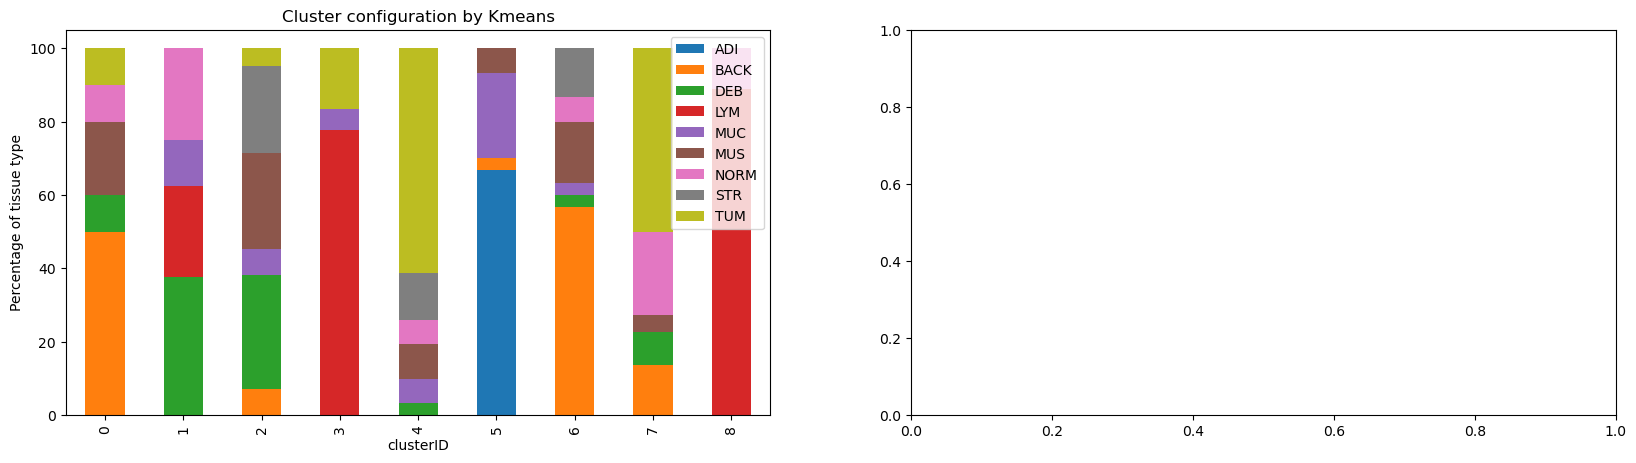

In [25]:
resulted_cluster_df = pd.DataFrame({'clusterID': kmeans_assignment, 'type': test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Kmeans')

# resulted_cluster_df = pd.DataFrame({'clusterID': louvain_assignment, 'type': test_label})
# label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
# pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


# number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
# df_idx = pivoted_label_proportion_df.index
# (pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

# axes[1].set_ylabel('Percentage of tissue type')
# axes[1].legend(loc='upper right')
# axes[1].set_title('Cluster configuration by Louvain')
f.show()

## HDBSCAN

In [26]:
import hdbscan
import seaborn as sns

In [27]:
pge_content.keys()

<KeysViewHDF5 ['file_name', 'pca_feature', 'umap_feature']>

In [28]:
pge_pca_feature.shape

(5000, 100)

In [46]:
pca_clusterer = hdbscan.HDBSCAN(min_cluster_size=int(pge_pca_feature.shape[0]*0.001),gen_min_span_tree=True)

In [47]:
pca_clusterer.min_cluster_size

5

/opt/anaconda3/envs/ml39/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/anaconda3/envs/ml39/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



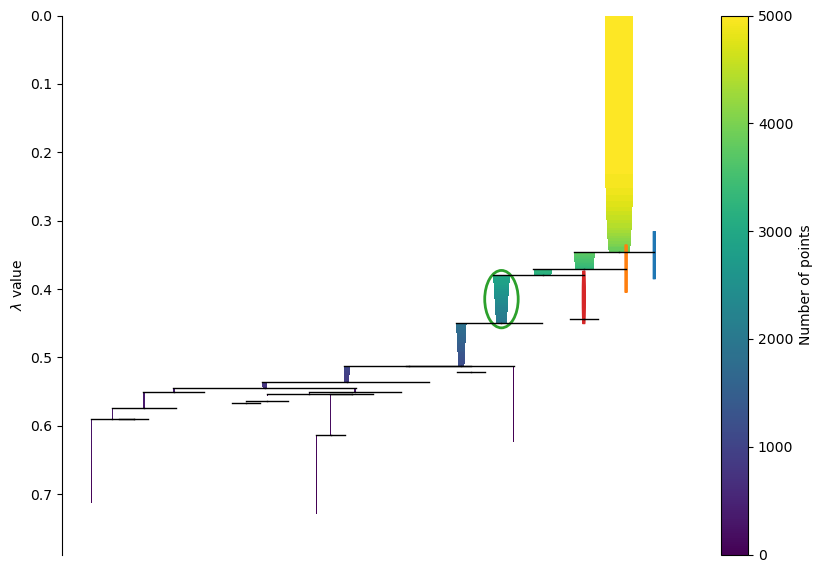

In [48]:
pca_clusterer.fit(pge_pca_feature)

plt.figure(figsize=(10, 7))
pca_clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [58]:
pca_hdbscan_assignment = pca_clusterer.labels_
mask=pca_hdbscan_assignment>-1
pca_hdbscan_assignment=pca_hdbscan_assignment[mask]
unique_clusters = sorted(set(pca_hdbscan_assignment))
masked_labels=labels[mask]

print("Number of clusters:", len(unique_clusters))

count={}

for i in pca_hdbscan_assignment:
    if i in count:
        count[i]+=1
    else:
        count[i]=1

print(count)


Number of clusters: 4
{np.int64(2): 2974, np.int64(0): 6, np.int64(3): 138, np.int64(1): 6}


/var/folders/gc/byy7wxsd27nf5wghs642zhgm0000gn/T/ipykernel_6963/4238081919.py:2: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



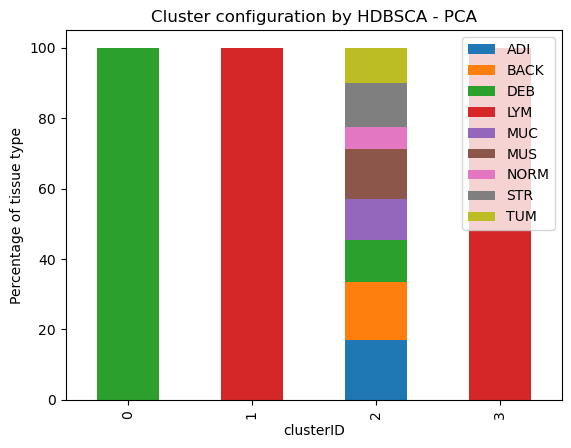

In [59]:
resulted_cluster_df = pd.DataFrame({'clusterID': pca_hdbscan_assignment, 'type': masked_labels})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')

number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True)

plt.ylabel('Percentage of tissue type')
plt.legend(loc='upper right')
plt.title('Cluster configuration by HDBSCA - PCA')

plt.show()

In [82]:
umap_clusterer = hdbscan.HDBSCAN(min_cluster_size=int(pge_pca_feature.shape[0]*0.021),gen_min_span_tree=True)

/opt/anaconda3/envs/ml39/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/opt/anaconda3/envs/ml39/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



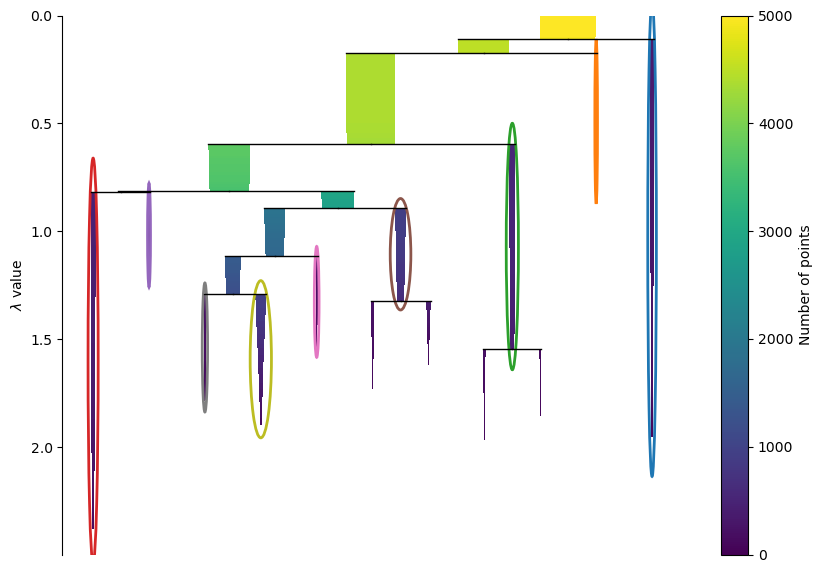

In [83]:
umap_clusterer.fit(pge_umap_feature)
plt.figure(figsize=(10, 7))
umap_clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())
plt.show()

In [84]:
umap_hdbscan_assignment = umap_clusterer.labels_
mask=umap_hdbscan_assignment>-1
umap_hdbscan_assignment=umap_hdbscan_assignment[mask]
unique_clusters = sorted(set(umap_hdbscan_assignment))
masked_labels=labels[mask]

print("Number of clusters:", len(unique_clusters))

count={}

for i in umap_hdbscan_assignment:
    if i in count:
        count[i]+=1
    else:
        count[i]=1

print(count)



Number of clusters: 9
{np.int64(3): 453, np.int64(4): 132, np.int64(8): 952, np.int64(0): 386, np.int64(7): 239, np.int64(1): 119, np.int64(5): 923, np.int64(6): 213, np.int64(2): 545}


/var/folders/gc/byy7wxsd27nf5wghs642zhgm0000gn/T/ipykernel_6963/3901148899.py:2: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



<Figure size 1600x1000 with 0 Axes>

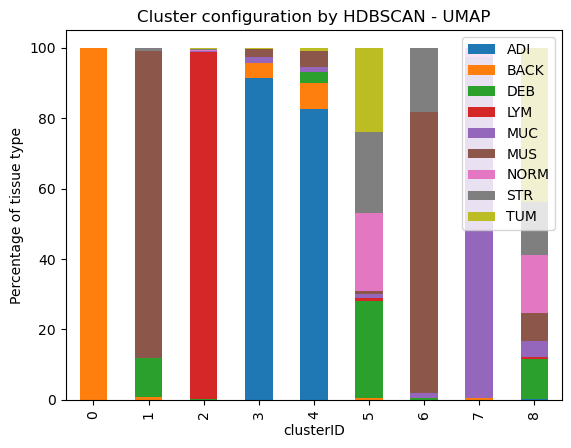

In [85]:
resulted_cluster_df = pd.DataFrame({'clusterID': umap_hdbscan_assignment, 'type': masked_labels})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')

plt.figure(figsize=(16,10))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True)

plt.ylabel('Percentage of tissue type')
plt.legend(loc='upper right')
plt.title('Cluster configuration by HDBSCAN - UMAP')

plt.show()